# setup

In [1]:
# Install a pip packaage in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install pandas==1.1.4
# !{sys.executable} -m pip install xlrd==1.2.0

In [2]:
import pandas as pd
import numpy as np
from numpy import outer, arange, ones

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# process data

In [3]:
file_distance = "/Users/audi/Downloads/data visualisation needed/example data chr distance to spindle equator.xlsx"
file_length = "/Users/audi/Downloads/data visualisation needed/example data spindle length.xlsx"

df_distance = pd.read_excel(file_distance)
df_length = pd.read_excel(file_length)

df_distance = df_distance.set_index(df_distance.columns[0])
df_length = df_length.set_index(df_length.columns[0])

def clean(x):
    if isinstance(x, str):
        return np.nan
    return x
df_distance = df_distance.applymap(clean)
df_length = df_length.applymap(clean)

In [4]:
df_distance = df_distance.loc[(df_distance.index <= 0) & (df_distance.index >= -200)]
df_length = df_length.loc[(df_length.index <= 0) & (df_length.index >= -200)]

In [5]:
df_distance.apply(lambda x: x.count(), axis=1).min()

72

In [6]:
def half(x):
    if not np.isnan(x):
        return x/2
    return x
df_length = df_length.applymap(half)

In [7]:
distance_means = df_distance.mean(axis=1, skipna=True)
distance_stds = df_distance.std(axis=1, skipna=True)
length_means = df_length.mean(axis=1, skipna=True)
length_stds = df_length.std(axis=1, skipna=True)

# plot

## colormap

In [8]:
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if len(float_list) > 0:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [9]:
hex_list = [
    "#FEFAE0",
    "#FFE66D",
    "#FCBF49",
    "#FFBA08",
    "#FAA307",
    "#F48C06",
    "#E85D04",
    "#DC2F02",
    "#D00000",
    "#9D0208",
    "#6A040F",
    "#370617",
    "#03071E"
]
hex_list = hex_list + hex_list[:-1][::-1]
proportion_list = [
    4,4,4,3,3,3,3,2,2,2,2,1
]
proportion_list = proportion_list + proportion_list[::-1]
float_list = [0]
for i in proportion_list:
    float_list.append(float_list[-1] + i/(sum(proportion_list)))
float_list[-1] = 1.0
assert(len(hex_list) == len(float_list))
distance_cmap = get_continuous_cmap(hex_list, float_list)

In [10]:
def show_colormap(colormap, vmin=-3, vmax=3):
    a=outer(arange(vmin,vmax,0.01),ones(1)).transpose()
    fig, ax = plt.subplots(1,1, figsize=(4, 0.5))
    img = ax.imshow(a,aspect='auto',cmap=colormap,origin="lower", vmin=vmin, vmax=vmax, extent=[vmin, vmax, -1, 1])
    x_label_list = [vmin, vmax]
    ax.set_xticks([vmin, vmax])
    ax.set_xticklabels(x_label_list)
    ax.set_yticks([])

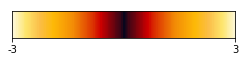

In [11]:
show_colormap(distance_cmap)

In [12]:
def get_continuous_cmap_bypoint(hex_list, float_list):
    x = np.array(float_list)
    normalized = (x-min(x))/(max(x)-min(x)).tolist()
    print(normalized)
    return get_continuous_cmap(hex_list, normalized)

[0.         0.83333333 1.        ]


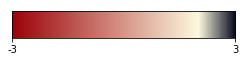

In [13]:
hex_list = ["#9D0208", "#FEFAE0", "#03071E"]
float_list = np.array([-3, 2 ,3])
tmp_cmap = get_continuous_cmap_bypoint(hex_list, float_list)
show_colormap(tmp_cmap)

## plot

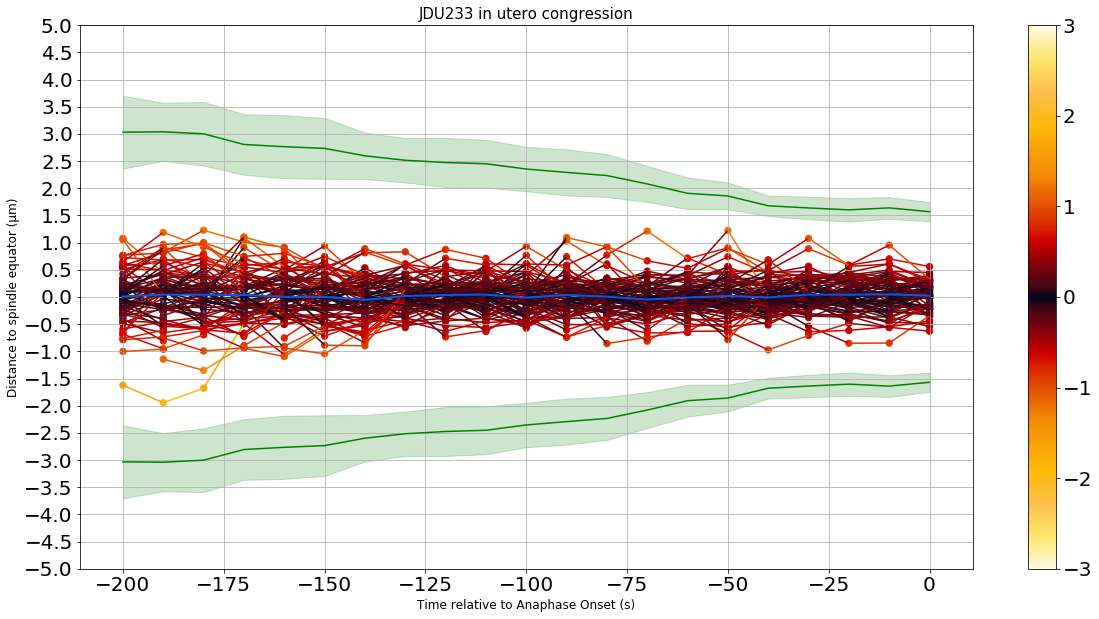

In [60]:
%matplotlib inline

# distance
fig, ax = plt.subplots(figsize=(20, 10))
norm = matplotlib.colors.Normalize(vmin=-3.0, vmax=3.0)
y = df_distance.index
for i in range(len(df_distance.columns)):
# for i in range(1):
    x = df_distance[df_distance.columns[i]]
    for j in range(len(x)-1):
        ax.plot(x.iloc[j:j+2], color=distance_cmap(norm(x.iloc[j])))
    sc = ax.scatter(y, x, c=x, label=df_distance.columns[i],
                    cmap=distance_cmap, 
#                     marker='$\u266B$',
                    marker='o',
                    vmin=-3, vmax=3, edgecolors="face",
                       s=40)
# means    
plt.errorbar(df_distance.index, distance_means, yerr=distance_stds, 
             linewidth=2, color='#0757ec', 
             elinewidth=2, ecolor='#0757ec')
#              , capsize=3, capthick=3)
cbar = plt.colorbar(sc)
cbar.ax.tick_params(labelsize=20) 
plt.grid()

# length
plt.plot(df_length.index, length_means, color='green')
plt.fill_between(df_distance.index, length_means - length_stds, length_means + length_stds,
                 color='green', alpha=0.2)
plt.plot(df_length.index, -length_means, color='green')
plt.fill_between(df_distance.index, -length_means - length_stds, -length_means + length_stds,
                 color='green', alpha=0.2)

plt.title("JDU233 in utero congression", size=15)
plt.ylabel("Distance to spindle equator (\u03BCm)", size=12)
plt.xlabel(df_distance.index.name, size=12)
plt.ylim((-5, 5))

plt.xticks(fontsize=20)

axes = plt.gca()

interval = 0.5
plt.yticks(np.arange(axes.get_ylim()[0], axes.get_ylim()[1]+interval, interval), fontsize=20)

plt.savefig('foo.jpg')